# Essential Bioinformatics - Get Transcript

CSI 5180 - Machine Learning for Bioinformatics

Marcel Turcotte (School of Electrical Engineering and Computer Science,
University of Ottawa)  
2025-01-21

# Learning Objectives

-   **Develop** a basic understanding of Jupyter Notebooks and their
    applications in computational research.
-   **Implement** code execution within Jupyter Notebooks by utilizing
    Google Colab as a cloud-based platform.
-   **Adapt** existing Jupyter Notebooks by making minor modifications
    and subsequently executing the revised code cells within the Google
    Colab environment.

# Quick Start Guide

## Interactive Exploration Without Installation

This notebook is designed for seamless online use, eliminating the need
for local installation. It is important to note that the code detailed
in this notebook requires the
[requests](https://pypi.org/project/requests/) library, which is
conveniently pre-installed on [Google
Colab](https://colab.research.google.com). To execute the code on Colab,
a Google account is necessary.

-   Launch the notebook on Google Colab by clicking the following link:
    [<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>](https://colab.research.google.com/github/turcotte/csi5180-w25/blob/main/notebooks/lectures/05/01_get_transcript.ipynb)

If you are accessing this document on the course website, you are
viewing an HTML-rendered version of a Jupyter Notebook (not the Jupyter
Notebook itself). To download the Jupyter Notebook directly, navigate to
the table of contents, usually located in the upper right corner of your
browser window, or download it directly via this link:
[01_get_transcript.ipynb](01_get_transcript.ipynb).

## View the Notebook Without Code Execution

For a static view of the notebook without executing any code, you can
access it via nbviewer:
[<img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" alt="Open In nbviewer"/>](https://nbviewer.jupyter.org/github/turcotte/csi5180-w25/blob/main/notebooks/lectures/05/01_get_transcript.ipynb)

# Concepts

A Jupyter notebook serves as an interactive computational platform that
integrates code execution, textual content, and multimedia into a
unified document. The primary components of a Jupyter notebook are as
follows:

## Cells

-   **Code Cells:** These cells are designed to hold executable code.
    While Python is the most commonly used language, other languages
    such as R, Julia, and Scala are also supported. The code within
    these cells is executed via the kernel, and the resulting output is
    displayed immediately below the cell.
-   **Markdown Cells:** These cells are used for text formatted in
    Markdown. They facilitate the inclusion of explanations, headers,
    bullet points, hyperlinks, images, and various other text formats
    within the notebook.
-   **Raw Cells:** These cells contain text that is neither executed nor
    rendered. They are particularly useful for embedding code snippets
    or unformatted text that should remain unchanged.

## Execution

-   **Standard Output:** The results of code execution, encompassing
    text, tables, and plots, are presented directly below the
    corresponding code cell.
-   **Rich Media Output:** Jupyter notebooks are capable of delivering
    rich media output, including HTML, images, videos, LaTeX, and
    interactive widgets, such as those provided by Plotly and Bokeh.

# Example

To ensure this example is self-contained, we will utilize the [Ensembl
REST API](https://github.com/Ensembl/ensembl-rest/wiki).

> [Ensembl](https://useast.ensembl.org/index.html) serves as a genome
> browser for vertebrate genomes, facilitating research in comparative
> genomics, evolutionary biology, sequence variation, and
> transcriptional regulation. It provides gene annotations, computes
> multiple alignments, predicts regulatory functions, and aggregates
> disease-related data. Ensembl’s suite of tools includes BLAST, BLAT,
> BioMart, and the Variant Effect Predictor (VEP), applicable to all
> supported species.

We will employ the Python [requests](https://pypi.org/project/requests/)
library to interact with the API. Let’s begin by importing this library.

In [1]:
import requests

We will define a function that leverages the Ensembl REST API to
retrieve the sequence of a specified transcript.

In [2]:
def get_transcript_info(transcript_id):

    """Fetches information about a given transcript from the Ensembl REST API."""

    server = "https://rest.ensembl.org"
    endpoint = f"/lookup/id/{transcript_id}"
    headers = {"Content-Type": "application/json"}
    
    response = requests.get(server + endpoint, headers=headers)
    
    if not response.ok:
        response.raise_for_status()
    
    return response.json()

The newly defined function is now being executed.

In [3]:
# A variable to store the ID of the transcript of interest
transcript_id = "ENST00000288602"
    
# Fetch and print transcript information
transcript_info = get_transcript_info(transcript_id)
print(f"Transcript ID: {transcript_info['id']}")
print(f"Gene Name: {transcript_info.get('display_name', 'N/A')}")
print(f"Transcript Name: {transcript_info.get('id', 'N/A')}")
print(f"Biotype: {transcript_info.get('biotype', 'N/A')}")
print(f"Species: {transcript_info.get('species', 'N/A')}")
print()

Transcript ID: ENST00000288602
Gene Name: BRAF-201
Transcript Name: ENST00000288602
Biotype: protein_coding
Species: homo_sapiens


The results of the execution have been incorporated into the notebook.

In [4]:
def get_cdna_sequence(transcript_id):

    """Fetches the cDNA sequence of a given transcript from the Ensembl REST API."""

    server = "https://rest.ensembl.org"
    endpoint = f"/sequence/id/{transcript_id}"
    headers = {"Content-Type": "application/json"}
    
    response = requests.get(server + endpoint, headers=headers, params={"type": "cdna"})
    
    if not response.ok:
        response.raise_for_status()
    
    data = response.json()
    return data['seq']

Executing the function `get_cdna_sequence`. Libraries (e.g. `requests`),
functions (e.g. `get_cdna_sequence`), and variables
(e.g. `transcript_id`) that were imported or defined in **previously**
executed cells are readily accessible for the current execution cell.

In [5]:
# Fetch cDNA sequence and find start codons
cdna_sequence = get_cdna_sequence(transcript_id)
print(cdna_sequence)

CCGCTCGGGCCCCGGCTCTCGGTTATAAGATGGCGGCGCTGAGCGGTGGCGGTGGTGGCGGCGCGGAGCCGGGCCAGGCTCTGTTCAACGGGGACATGGAGCCCGAGGCCGGCGCCGGCGCCGGCGCCGCGGCCTCTTCGGCTGCGGACCCTGCCATTCCGGAGGAGGTGTGGAATATCAAACAAATGATTAAGTTGACACAGGAACATATAGAGGCCCTATTGGACAAATTTGGTGGGGAGCATAATCCACCATCAATATATCTGGAGGCCTATGAAGAATACACCAGCAAGCTAGATGCACTCCAACAAAGAGAACAACAGTTATTGGAATCTCTGGGGAACGGAACTGATTTTTCTGTTTCTAGCTCTGCATCAATGGATACCGTTACATCTTCTTCCTCTTCTAGCCTTTCAGTGCTACCTTCATCTCTTTCAGTTTTTCAAAATCCCACAGATGTGGCACGGAGCAACCCCAAGTCACCACAAAAACCTATCGTTAGAGTCTTCCTGCCCAACAAACAGAGGACAGTGGTACCTGCAAGGTGTGGAGTTACAGTCCGAGACAGTCTAAAGAAAGCACTGATGATGAGAGGTCTAATCCCAGAGTGCTGTGCTGTTTACAGAATTCAGGATGGAGAGAAGAAACCAATTGGTTGGGACACTGATATTTCCTGGCTTACTGGAGAAGAATTGCATGTGGAAGTGTTGGAGAATGTTCCACTTACAACACACAACTTTGTACGAAAAACGTTTTTCACCTTAGCATTTTGTGACTTTTGTCGAAAGCTGCTTTTCCAGGGTTTCCGCTGTCAAACATGTGGTTATAAATTTCACCAGCGTTGTAGTACAGAAGTTCCACTGATGTGTGTTAATTATGACCAACTTGATTTGCTGTTTGTCTCCAAGTTCTTTGAACACCACCCAATACCACAGGAAGAGGCGTCCTTAGCAGAGACTGCCCTAACATCTGGATCATCCCCTTCCGCACCCGCCTCGGA

We are now focused on identifying all potential start codons.

In [6]:
def find_start_codons(sequence):
    """Finds and returns the positions of all start codons (ATG) in the sequence."""
    start_codon = "ATG"
    start_codon_positions = []

    for i in range(len(sequence) - 2):
        if sequence[i:i+3] == start_codon:
            start_codon_positions.append(i + 1)  # +1 to convert to 1-based indexing

    return start_codon_positions

Executing the function `find_start_codons`.

In [7]:
# Find start codons

start_codon_positions = find_start_codons(cdna_sequence)
    
print(f"Start codon positions in the cDNA sequence of {transcript_id}:")
print(start_codon_positions)

Start codon positions in the cDNA sequence of ENST00000288602:
[30, 96, 186, 274, 298, 378, 457, 585, 588, 634, 697, 715, 818, 864, 877, 1078, 1132, 1168, 1201, 1224, 1461, 1492, 1510, 1579, 1585, 1599, 1606, 1648, 1678, 1698, 1797, 1839, 1903, 1958, 2007, 2028, 2062, 2068, 2089, 2097, 2151, 2214, 2226, 2254, 2386, 2428, 2456, 2499, 2507, 2519]

To illustrate the application of Jupyter Notebooks for data
visualization, consider a straightforward example. Notably, Jupyter
Notebooks are highly effective tools for conducting exploratory data
analysis.

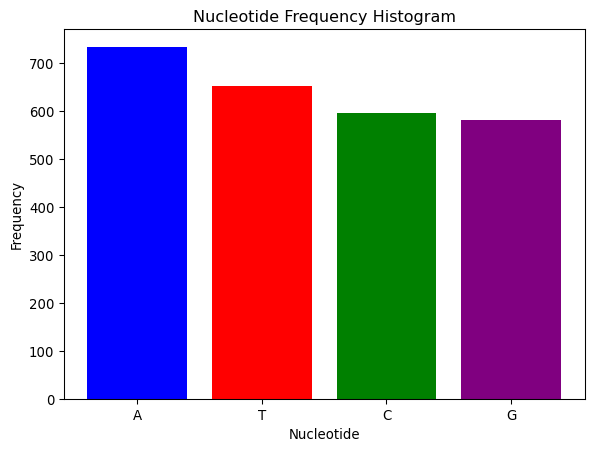

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_nucleotide_histogram(sequence):

    """Plots a histogram of nucleotide frequencies in the sequence."""

    nucleotide_counts = Counter(sequence)
    nucleotides = ['A', 'T', 'C', 'G']
    counts = [nucleotide_counts[nucleotide] for nucleotide in nucleotides]

    plt.bar(nucleotides, counts, color=['blue', 'red', 'green', 'purple'])
    plt.title('Nucleotide Frequency Histogram')
    plt.xlabel('Nucleotide')
    plt.ylabel('Frequency')
    plt.show()

# Plot nucleotide frequency histogram
plot_nucleotide_histogram(cdna_sequence)

In the previous example, the `plot_nucleotide_histogram` function is
invoked within the same cell where it is defined. This setup results in
the redefinition of the function each time it is executed. Furthermore,
any modification to the function necessitates re-execution of the cell,
which automatically triggers the function call. To enhance clarity and
maintainability, I advocate for separating function definition from
invocation, as demonstrated earlier. This separation not only improves
code readability but also facilitates iterative development and
debugging.

# Exercise

-   Write function that identifies the first open reading frame.